In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import model_from_json

In [2]:
print(os.listdir('../own_dataset/1d10_zoom/train'))

['8', '5', '1', '7', '4', '0', '3', '6', '2', '9']


In [3]:
train_path= ('../own_dataset/1d10_zoom/train')
test_path= ('../own_dataset/1d10_zoom/test')

In [4]:
batch_size_train=30  #,batch_size= batch_size_train
batch_size_valid=30
targetsize= 100
datagen=ImageDataGenerator(rotation_range=360,brightness_range=[0.7,1.2],height_shift_range=0.1
                           ,width_shift_range=0.1,zoom_range=[0.7,1.1])
train_batches= datagen.flow_from_directory(train_path, target_size=(targetsize,targetsize), 
                                                                      classes=os.listdir('../own_dataset/1d10_zoom/train'),
                                                                      batch_size= batch_size_train)
test_batches= datagen.flow_from_directory(test_path,  target_size=(targetsize,targetsize), 
                                                                     classes=os.listdir('../own_dataset/1d10_zoom/test'),
                                                                     batch_size= batch_size_train)

Found 17532 images belonging to 10 classes.
Found 3558 images belonging to 10 classes.


In [5]:
def plots(ims, figsize=(20,10), rows=1, interp= False, titles= None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims= ims.transpose((0,1,2,3))
    f= plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(5):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

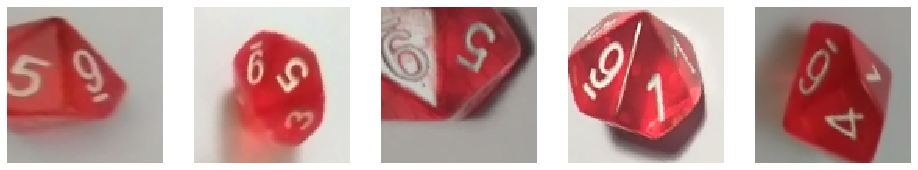

In [6]:
plots(train_batches[1][0],figsize=(100,70))

In [7]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 *0.95**x)

In [8]:
"""

nfilters = [8, 16]
kernel_sizes = [(4,4), (2,2)]


model = Sequential()
# CONV1 (ReLU) > POOL1
model.add(Conv2D(nfilters[0], kernel_sizes[0], # 8 filters, 4x4
                 strides=(1,1),
                 padding='same', 
                 input_shape=(targetsize,targetsize, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(8,8),
                       strides=(8,8),
                       padding='same'))
# CONV2 (ReLU) > POOL2
model.add(Conv2D(nfilters[1], kernel_sizes[1], # 16 filters, 2x2
                 strides=(1,1),
                 padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4),
                       strides=(4,4),
                       padding='same'))

# Fully connected layer with softmax
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()
"""

"\n\nnfilters = [8, 16]\nkernel_sizes = [(4,4), (2,2)]\n\n\nmodel = Sequential()\n# CONV1 (ReLU) > POOL1\nmodel.add(Conv2D(nfilters[0], kernel_sizes[0], # 8 filters, 4x4\n                 strides=(1,1),\n                 padding='same', \n                 input_shape=(targetsize,targetsize, 3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(8,8),\n                       strides=(8,8),\n                       padding='same'))\n# CONV2 (ReLU) > POOL2\nmodel.add(Conv2D(nfilters[1], kernel_sizes[1], # 16 filters, 2x2\n                 strides=(1,1),\n                 padding='same',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(4,4),\n                       strides=(4,4),\n                       padding='same'))\n\n# Fully connected layer with softmax\nmodel.add(Flatten())\nmodel.add(Dense(6, activation='softmax'))\nmodel.summary()\n"

In [9]:

"""
model.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])
history= model.fit_generator(train_batches, steps_per_epoch= len(train_batches) , callbacks=[reduce_lr],
                             validation_data=train_batches, validation_steps= len(train_batches), 
                             epochs=500)
"""

"\nmodel.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])\nhistory= model.fit_generator(train_batches, steps_per_epoch= len(train_batches) , callbacks=[reduce_lr],\n                             validation_data=train_batches, validation_steps= len(train_batches), \n                             epochs=500)\n"

In [10]:
#cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [11]:
#model.save('/home/ordovas/IRONHACK/dice-scores-recognition/model_d6_augmented_c1.h5')

In [12]:

model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))


model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding='SAME', activation='relu'))
#model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

In [13]:
model2.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])
history2= model2.fit_generator(train_batches, steps_per_epoch= len(train_batches) , 
                             validation_data=test_batches, validation_steps= len(test_batches), 
                             epochs=100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
585/585 [==============================] - 247s 421ms/step - loss: 3.1247 - accuracy: 0.1369 - val_loss: 2.2486 - val_accuracy: 0.1425
Epoch 2/100
585/585 [==============================] - 327s 559ms/step - loss: 2.2360 - accuracy: 0.1528 - val_loss: 2.2377 - val_accuracy: 0.1625
Epoch 3/100
585/585 [==============================] - 335s 572ms/step - loss: 2.2191 - accuracy: 0.1601 - val_loss: 2.2025 - val_accuracy: 0.1768
Epoch 4/100
585/585 [==============================] - 363s 620ms/step - loss: 2.1848 - accuracy: 0.1806 - val_loss: 2.1454 - val_accuracy: 0.1917
Epoch 5/100
585/585 [==============================] - 365s 624ms/step - loss: 2.1624 - accuracy: 0.2018 - val_loss: 2.1655 - val_accuracy: 0.2046
Epoch 6/100
585/585 [==============================] - 372s 637ms/step - loss: 2.0367 - accuracy: 0.2467 - val_loss: 1.9871 - val_accuracy: 0.2656
Epoch 7/100
585/585 [=====================

Epoch 55/100
585/585 [==============================] - 298s 509ms/step - loss: 0.3776 - accuracy: 0.8824 - val_loss: 0.5352 - val_accuracy: 0.8561
Epoch 56/100
585/585 [==============================] - 297s 507ms/step - loss: 0.3689 - accuracy: 0.8854 - val_loss: 0.4250 - val_accuracy: 0.8786
Epoch 57/100
585/585 [==============================] - 299s 511ms/step - loss: 0.4118 - accuracy: 0.8813 - val_loss: 0.4822 - val_accuracy: 0.8567
Epoch 58/100
585/585 [==============================] - 300s 512ms/step - loss: 0.3774 - accuracy: 0.8862 - val_loss: 0.5524 - val_accuracy: 0.8651
Epoch 59/100
585/585 [==============================] - 298s 509ms/step - loss: 0.3700 - accuracy: 0.8873 - val_loss: 0.4654 - val_accuracy: 0.8758
Epoch 60/100
585/585 [==============================] - 302s 516ms/step - loss: 0.3516 - accuracy: 0.8921 - val_loss: 0.5065 - val_accuracy: 0.8752
Epoch 61/100
585/585 [==============================] - 300s 513ms/step - loss: 0.3603 - accuracy: 0.8916 - val_

In [14]:
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [15]:
model2.save('model_1d10_zoom.h5')

In [16]:
model2_json = model2.to_json()
with open("model_1d10_zoom.json", "w") as json_file:
    json_file.write(model2_json)

In [17]:
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/



In [20]:
aa=history2.epoch

In [21]:
aa

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]